In [174]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm 
from ISLP import load_data 
from ISLP.models import (ModelSpec as MS, 
                         summarize, 
                         poly)

In [175]:
# *args allows any number of non-names args to abline
# **kwargs allows any number of named args (like linewidth=3)
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

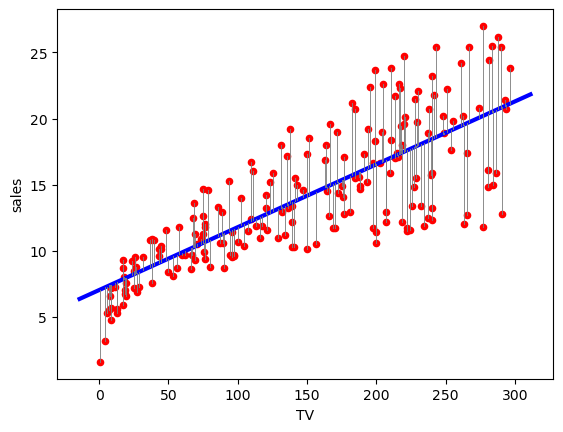

In [176]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# terms = advertising.columns.drop(['sales', 'Unnamed: 0'])
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
ax = advertising.plot.scatter('TV', 'sales', c='red')
abline(ax, 
       results.params.iloc[0], 
       results.params.iloc[1], 
       'b-', 
       linewidth=3)
# Plot the residuals
y_pred = results.fittedvalues
for x, y_actual, y_hat in zip(advertising['TV'], y, y_pred):
    ax.plot([x, x], [y_actual, y_hat], color='gray', linewidth=0.7, alpha=0.9)

***Figure 3.1.***: For the advertising data, the least squares fit for the regression of sales onto TV. Each grey line segment is a residual. 

### Broadcasting review: 
When performing operations on two arrays, NumPy compares their shapes right to left:

1. If the dimensions match (or either is 1), they are compatible.

2. If the dimensions don't match and neither is 1, broadcasting fails.

NumPy virtually stretches any dimension of size 1 to match the other

In [177]:
# Ex. 1 
x = np.array([1, 2, 3])
x + 10                          # Scalar gets broadcast -> [11, 12, 13]

array([11, 12, 13])

In [178]:
# Ex. 2 
a = np.array([[1], [2], [3]])   # (3,1)
b = np.array([10, 20, 30])      # (3,) same as (1,3)
a + b                           # (3, 3)

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33]])

In [179]:
# Ex. 3 Adding singletons for broadcasting an outerproduct
arr1 = np.array([1, 2, 3])                                     # (3, )
print(f"The shape of \n {arr1[:, None]} is \n {arr1[:, None].shape}") # (3,1)
arr2 = np.array([10, 20, 30, 40])                              # (4, )
print(f"The shape of {arr2[None, :]} is {arr2[None, :].shape}")   # (1,4)
outer = arr1[:, None] * arr2[None, :]                             # (3,1) * (1,4) -> (3,4)
print(f"The shape of outer \n {outer} is \n{outer.shape}")

The shape of 
 [[1]
 [2]
 [3]] is 
 (3, 1)
The shape of [[10 20 30 40]] is (1, 4)
The shape of outer 
 [[ 10  20  30  40]
 [ 20  40  60  80]
 [ 30  60  90 120]] is 
(3, 4)


xvals:
[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
yvals:
[-4.         -3.11111111 -2.22222222 -1.33333333 -0.44444444  0.44444444
  1.33333333  2.22222222  3.11111111  4.        ]

xcoord (x grid):
[[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.77777778  3.88888889  5.        ]
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
   1.66666667  2.777777

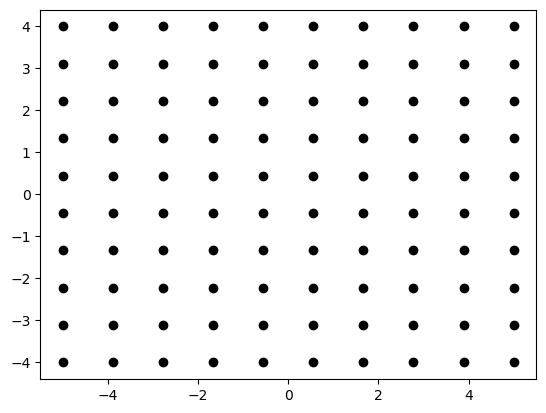

In [180]:
nx, ny = (10,10)
xvals = np.linspace(-5, 5, nx)
yvals = np.linspace(-4, 4, ny)
xcoord, ycoord = np.meshgrid(xvals, yvals)
print(f'xvals:\n{xvals}')
print(f'yvals:\n{yvals}')
print(f'\nxcoord (x grid):\n{xcoord}')
print(f'ycoord (y grid):\n{ycoord}')
fig, ax = subplots()
ax.plot(xcoord, ycoord, 'ko');

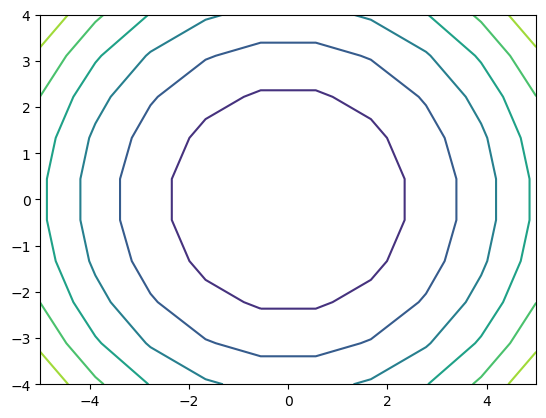

In [181]:
fig, ax = subplots()
z = xcoord**2 + ycoord**2 
ax.contour(xcoord, ycoord, z);

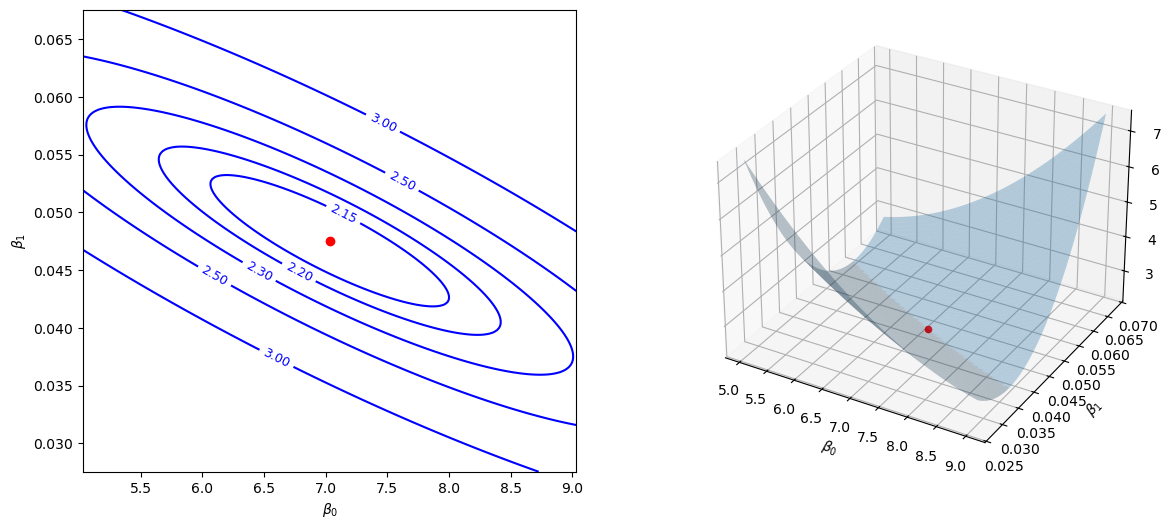

In [182]:
# Let's create an array of equally spaced values around beta0, beta1
beta0 = np.linspace(results.params.iloc[0] - 2, results.params.iloc[0] + 2, 200)
beta1 = np.linspace(results.params.iloc[1] - 0.02, results.params.iloc[1] + 0.02, 200)
beta0c, beta1c = np.meshgrid(beta0, beta1)
x_values = X.values[:,1]
y_values = y.values
y_pred = beta0c[None, :, :] + x_values[:, None, None] * beta1c[None, :, :]
residuals = y_values[:, None, None] - y_pred
rss = np.sum(residuals**2, axis=0)/1000
# To create two subplots with different projections 2D and 3D we need to create each subplot separately with projection
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(121)
CS = ax1.contour(beta0c, beta1c, rss, colors='blue', levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.clabel(CS, fontsize=9, colors='blue')
ax1.scatter(results.params.iloc[0], results.params.iloc[1], color='red')
ax2 = fig.add_subplot(122, projection='3d')
# alpha will change the opacity of the surface
ax2.plot_surface(beta0c, beta1c, rss, rstride=3, cstride=3, alpha=0.3)
ax2.scatter3D(results.params.iloc[0], results.params.iloc[1], rss.min(), color='red')
ax2.view_init(elev=30, azim=-60)
ax2.set_zlim(rss.min(), rss.max())
for ax in fig.axes: 
    ax.set_xlabel(r"$\beta_0$")
    ax.set_ylabel(r"$\beta_1$")
ax2.set_zlabel(r"$RSS$")
#plt.subplots_adjust(wspace=0.1)
plt.show()

In [183]:
# More modular versions of above code 
def compute_rss_surface(b0_range, b1_range, x_values, y_values, scale=1000.0):
    """
    Compute a 2D grid of RSS for intercept (b0) and slope (b1) values.
    
    Parameters
    ----------
    b0_range : np.ndarray
        1D array of possible beta0 (intercept) values.
    b1_range : np.ndarray
        1D array of possible beta1 (slope) values.
    x_values : np.ndarray
        Flattened feature array, shape (n_samples,).
    y_values : np.ndarray
        Target array, shape (n_samples,).
    scale : float
        Factor to divide raw RSS by (purely for nicer plotting ranges).

    Returns
    -------
    B0, B1 : np.ndarray
        Meshgrid of shape (len(b1_range), len(b0_range)) for intercept & slope.
    rss : np.ndarray
        RSS at each (b0, b1) point, same shape as B0 & B1.
    """
    B0, B1 = np.meshgrid(b0_range, b1_range)  # (n_b1, n_b0)
    
    # Broadcast x and (b0, b1) to compute predictions
    y_pred = B0[None, :, :] + x_values[:, None, None] * B1[None, :, :]
    residuals = y_values[:, None, None] - y_pred
    
    rss_raw = np.sum(residuals**2, axis=0)  # (n_b1, n_b0)
    rss = rss_raw / scale
    return B0, B1, rss

In [184]:
def plot_contour_and_surface(B0, B1, rss, b0_est, b1_est, levels=None):
    """
    Display a 2D contour of RSS and a 3D surface side by side.

    Parameters
    ----------
    B0, B1 : np.ndarray
        Meshgrids for beta0, beta1 (shapes match rss).
    rss : np.ndarray
        2D array of RSS values.
    b0_est, b1_est : float
        Highlighted "solution" point on both plots.
    levels : list of floats, optional
        Specific contour levels; if None, uses default levels.
    """
    # Create two subplots: left (2D), right (3D)
    fig = plt.figure(figsize=(14, 6))
    
    # --- (1) 2D Contour ---
    ax1 = fig.add_subplot(1, 2, 1)
    if levels is None:
        contour = ax1.contour(B0, B1, rss, cmap='viridis')
    else:
        contour = ax1.contour(B0, B1, rss, levels=levels, colors='blue')
        ax1.clabel(contour, fontsize=9, colors='blue')
    ax1.scatter(b0_est, b1_est, color='red', label='OLS Est.')
    ax1.set_xlabel(r"$\beta_0$")
    ax1.set_ylabel(r"$\beta_1$")
    ax1.set_title("RSS Contour")
    ax1.legend()
    ax1.grid(True)
    
    # --- (2) 3D Surface ---
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(B0, B1, rss, rstride=3, cstride=3, alpha=0.3)
    ax2.scatter3D(b0_est, b1_est, rss.min(), color='red')
    ax2.set_xlabel(r"$\beta_0$")
    ax2.set_ylabel(r"$\beta_1$")
    ax2.set_zlabel("RSS")
    ax2.view_init(elev=30, azim=-60)
    ax2.set_title("RSS Surface")
    
    plt.tight_layout()
    plt.show()

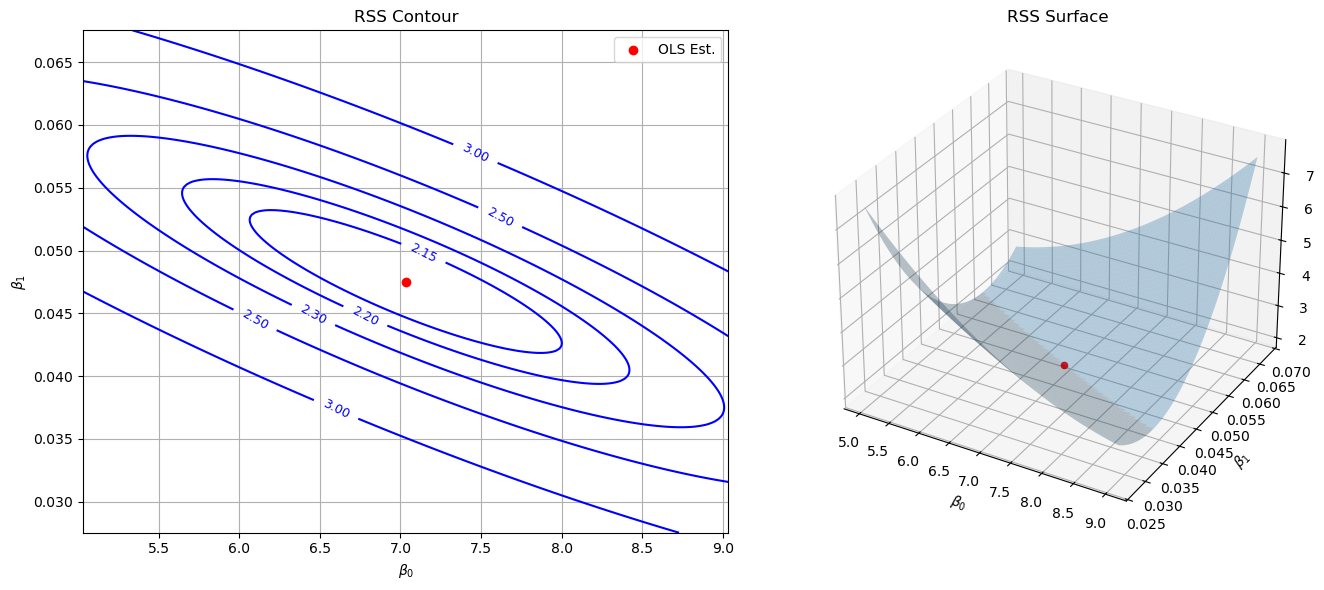

In [185]:

# b0_est and b1_est: from your fitted model, e.g. statsmodels OLS
b0_est = results.params.iloc[0]
b1_est = results.params.iloc[1]

# Ranges for beta0, beta1 around the estimated solution
b0_range = np.linspace(b0_est - 2, b0_est + 2, 200)
b1_range = np.linspace(b1_est - 0.02, b1_est + 0.02, 200)

# Compute the RSS surface
B0, B1, rss = compute_rss_surface(
    b0_range, b1_range, 
    x_values=X.values[:, 1],  # assume X[:,1] is your single feature
    y_values=y.values,
    scale=1000.0
)

# Plot both contour (2D) and surface (3D)
plot_contour_and_surface(B0, B1, rss, b0_est, b1_est, levels=[2.15, 2.2, 2.3, 2.5, 3])

***Figure 3.2.*** Contour and three-dimensional plots of the RSS on the
Advertising data, using sales as the response and TV as the predictor. The
red dots correspond to the least squares estimates $\beta_0$ and $\beta_1$.

In [186]:
# Noise level
sigma = 5 
# Sample size 
n = 100
# Noise for model 
noise = np.random.normal(0, sigma, n)
# Sample 100 points for X  
X = np.random.uniform(-3, 3, n)
y_data = 3 * X + 2 + noise
y_actual = 3 * X + 2 
model = sm.OLS(y_data, np.column_stack((np.ones(n), X)))   
results = model.fit()
results.params

array([1.80742353, 2.896923  ])

In [187]:
def plot_k_fits(ax, k, n, sigma, *args, **kwargs):
    for _ in range(k):
        X = np.random.uniform(-3, 3, n)
        noise = np.random.normal(0, sigma, n)
        y_data = 3 * X + 2 + noise

        # Design matrix with intercept
        X_design = np.column_stack((np.ones(n), X))
        model = sm.OLS(y_data, X_design)
        results = model.fit()

        # Use fixed x range for consistency
        x_vals = np.linspace(-3, 3, 100)
        y_vals = results.params[0] + results.params[1] * x_vals

        ax.plot(x_vals, y_vals, *args, **kwargs)

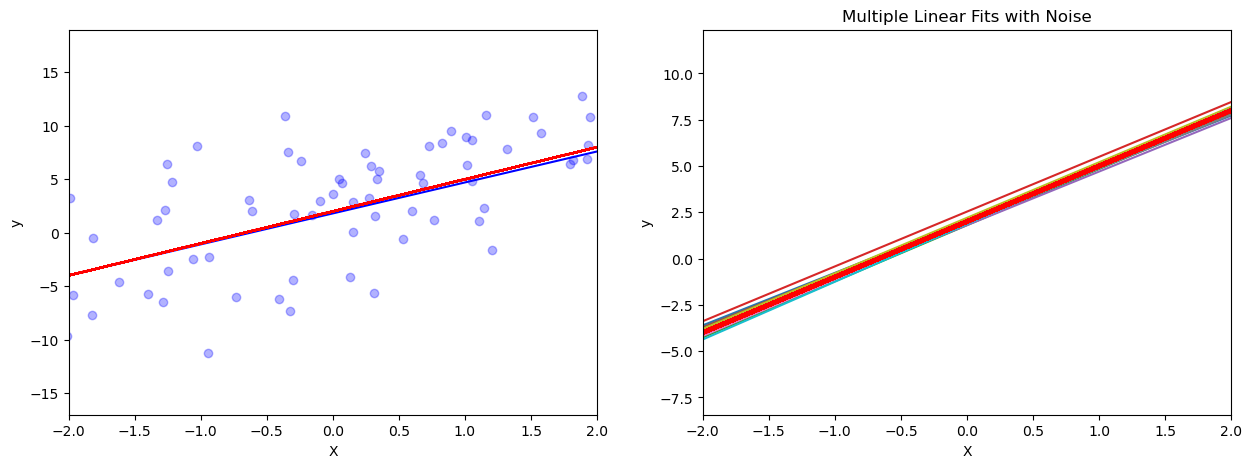

In [188]:
fig, ax = subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X, y_data, color='blue', alpha=0.3)
abline(ax[0], 
       results.params[0], 
       results.params[1],
       'b')
ax[0].plot(X, y_actual, color='red')
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
plot_k_fits(ax[1], k=10, n=100, sigma=2)
ax[1].plot(X, y_actual, color='red', linewidth=3)
ax[1].set_xlim(-2, 2)
ax[1].set_title('Multiple Linear Fits with Noise')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y');



***Figure 3.3.*** A simulated data set. Left: The red line represents the true
relationship, $f(X) = 2 + 3X$, which is known as the population regression line.
The blue line is the least squares line; it is the least squares estimate for $f(X)$
based on the observed data, shown in black. Right: The population regression line
is again shown in red, and the least squares line in dark blue. In light blue, ten
least squares lines are shown, each computed on the basis of a separate random
set of observations. Each least squares line is different, but on average, the least
squares lines are quite close to the population regression line.

In [200]:
X = MS(['TV']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,7.0326,0.458,15.360,0.0
TV,0.0475,0.003,17.668,0.0


***Table 3.1.*** For the Advertising data, coefficients of the least squares model
for the regression of number of units sold on TV advertising budget. An increase
of $1,000 in the TV advertising budget is associated with an increase in sales by
around 50 units. (Recall that the sales variable is in thousands of units, and the
TV variable is in thousands of dollars.)

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        16:52:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Table 3.2.*** For the Advertising data, more information about the least
squares model for the regression of number of units sold on TV advertising budget.

### Simple Regression Case for Radio and Newspaper

In [ ]:
X = MS(['radio']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]a

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [207]:
X = MS(['newspaper']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


***Table 3.3. and 3.4.***
A $1,000 increase in spending on radio advertising is associated with an average increase in sales by around 203 units, while the same increase in spending on newspaper advertising is associated with an average increase in sales by around 55 units. (Note that the sales variable is in thousands of units, and the radio and newspaper variables are in thousands of dollars.)



### Multiple Regression Case

In [211]:
X = MS(['TV', 'radio', 'newspaper']).fit_transform(advertising)
y = advertising['sales']
model = sm.OLS(y, X)
results = model.fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


In [ ]:
from pathlib import Path 
# get current working directory 
path_to_data = Path.cwd() / 'data'
file = 'Advertising.csv'
advertising = pd.read_csv(path_to_data/file)
# advertising = advertising.drop(columns=['Unnamed: 0']) 
# changes original dataframe. 
advertising.drop(columns=['Unnamed: 0'], inplace=True) # slightly more efficient
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [231]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df.drop(columns=['A'])

,B,C,D
0,1,2,3
1,5,6,7
2,9,10,11
